## Imports

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Dataset

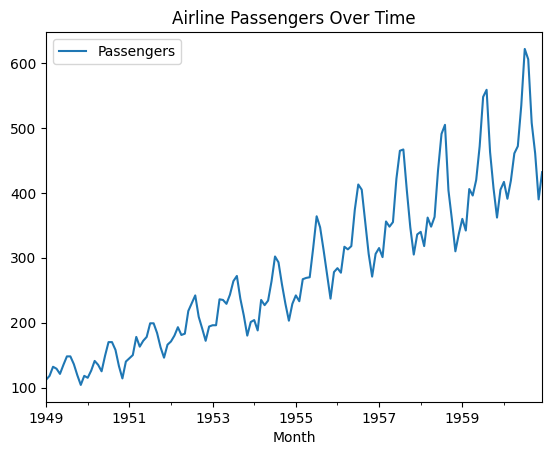

In [8]:
# Load the Airline Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Visualize the dataset
data.plot()
plt.title("Airline Passengers Over Time")
plt.show()

# Use the values for modeling
y = data.values

## prepare dataset

In [9]:
# Prepare the data using TimeseriesGenerator
seq_length = 12  # Use 12 months as the sequence length
generator = TimeseriesGenerator(y, y, length=seq_length, batch_size=1)

# Check the shape of the generated data
for i in range(len(generator)):
    x_batch, y_batch = generator[i]
    print(f"X shape: {x_batch.shape}, Y shape: {y_batch.shape}")
    break  # Just check the first batch

X shape: (1, 12, 1), Y shape: (1, 1)


## define RNN

In [10]:
# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mse')



## Train model

In [13]:
# Train the model
model.fit(generator, epochs=20)



Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - loss: 22562.4199
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 3809.9031
Epoch 3/20
  1/132 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6176.4404

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 3311.4163
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 1872.9863
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 1232.6598
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 1311.4294
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 782.1920
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 581.8309
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 691.6976
Epoch 10/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 375.4568
Epoch 11/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 736.5493
Epoch 12/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 411.9935
Epoch 13/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 741.1252
Epoch 14/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 325.7154
Epoch 15/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 188.3167
Epoch 16/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 335.6961
Epoch 

## Predictions

In [14]:
# Make predictions
predictions = model.predict(generator)



132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


## Result plot

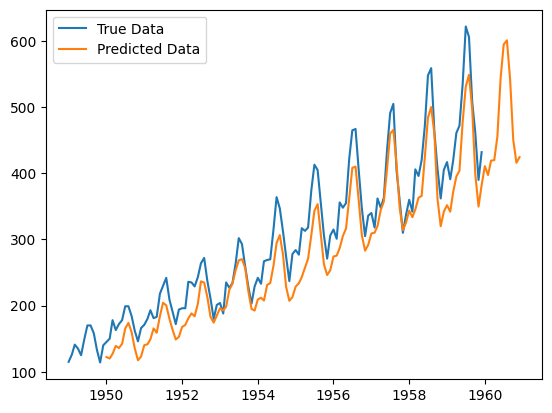

In [15]:
# Plot the results
plt.plot(data.index[:len(y) - seq_length], y[seq_length:], label="True Data")
plt.plot(data.index[seq_length:], predictions, label="Predicted Data")
plt.legend()
plt.show()